## **Ex.1 - Loading the dataset**

> Indented block



In [141]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
# Machine learning
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

In [143]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<hr>

Splitting the data into 70% training and 30% test subsets.

In [144]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,
                     stratify=y,
                     random_state=0)

Standardizing the data.

In [145]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [146]:
X_train_std

array([[ 0.71225893,  2.22048673, -0.13025864, ..., -0.20017028,
        -0.82164144, -0.62946362],
       [ 0.88229214, -0.70457155,  1.17533605, ...,  1.33982592,
         0.54931269,  1.47568796],
       [ 0.84585645, -0.73022996,  1.17533605, ...,  1.06806189,
         0.1308109 ,  1.62934866],
       ...,
       [ 1.02803489,  2.29746195, -0.5778911 , ..., -1.69487249,
        -1.86068037, -1.04434751],
       [-1.30384913, -1.08089484, -0.31677217, ...,  0.16218176,
         0.73691694,  0.40313628],
       [-0.40510216,  1.29678411,  0.05625489, ...,  1.06806189,
         0.73691694, -0.89683324]])

## **Ex.2 - Principal component analysis in scikit-learn**

### Part 1 - *Perform PCA and present the explained variance ratio* (check https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Perform the transformation on test data and plot the first two principal components.

Razão de Variância Explicada:
 [0.36951469 0.18434927]


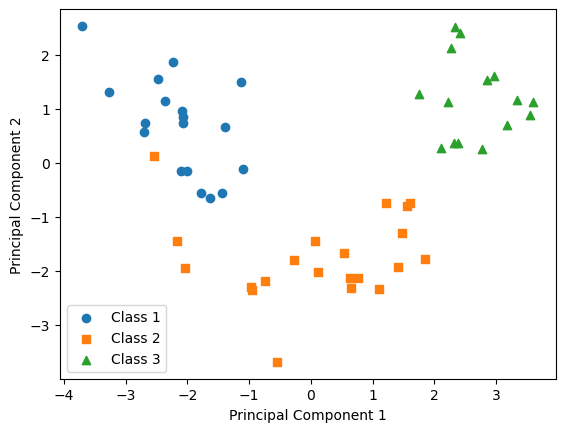

In [160]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
v = pca.fit_transform(X_train_std)
explained_variance = pca.explained_variance_ratio_
print("Razão de Variância Explicada:\n", explained_variance)
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
plt.scatter(X_test_pca[y_test == 1, 0], X_test_pca[y_test == 1, 1], label='Class 1', marker='o')
plt.scatter(X_test_pca[y_test == 2, 0], X_test_pca[y_test == 2, 1], label='Class 2', marker='s')
plt.scatter(X_test_pca[y_test == 3, 0], X_test_pca[y_test == 3, 1], label='Class 3', marker='^')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


Razão de Variância Explicada:
 [0.36951469 0.18434927]


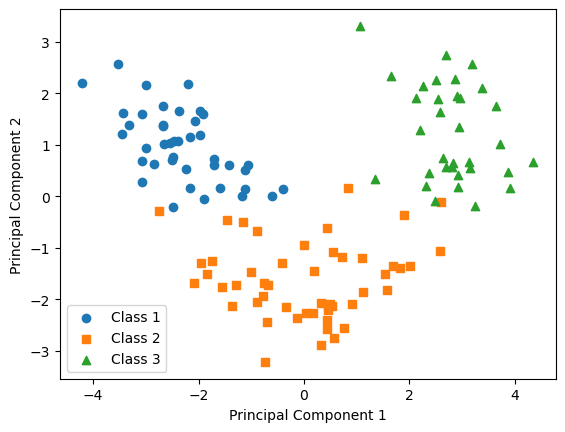

(54, 2)

In [161]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
v = pca.fit_transform(X_train_std)
explained_variance = pca.explained_variance_ratio_
print("Razão de Variância Explicada:\n", explained_variance)
plt.scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1], label='Class 1', marker='o')
plt.scatter(X_train_pca[y_train == 2, 0], X_train_pca[y_train == 2, 1], label='Class 2', marker='s')
plt.scatter(X_train_pca[y_train == 3, 0], X_train_pca[y_train == 3, 1], label='Class 3', marker='^')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

X_test_pca.shape

In [162]:
X_train_pca

array([[ 2.38299011,  0.45458499],
       [-1.96578183,  1.65376939],
       [-2.53907598,  1.02909066],
       [-1.43010776,  0.6024011 ],
       [ 3.14147227,  0.66214979],
       [ 0.50253552, -2.08907131],
       [ 0.04867722, -2.27536044],
       [ 2.47888989, -0.08603318],
       [ 2.01900259, -1.3538719 ],
       [ 0.75156583, -2.55367947],
       [ 0.72268915, -1.18404391],
       [-3.00366211,  0.94626934],
       [ 2.57518878, -1.0697549 ],
       [ 3.73151104,  1.01968876],
       [-1.12276518,  0.13877   ],
       [ 2.85996853,  2.28819559],
       [-0.74717125, -3.21746061],
       [-1.58427878,  0.16048055],
       [ 3.38887101,  2.11550689],
       [ 3.15405473,  0.54233966],
       [-1.28036506, -1.72926871],
       [-1.71438911,  0.71745249],
       [-1.55040291, -1.7580591 ],
       [ 1.10984489, -1.20480693],
       [-0.69108418, -1.71385374],
       [-2.086036  , -1.68453671],
       [ 2.90393456,  1.95258805],
       [-2.07635784,  1.47183304],
       [-1.74756185,

### Part 2 - *Training logistic regression classifier using the first 2 principal components*. Using a cross-validation procedure (check https://scikit-learn.org/stable/modules/cross_validation.html), select the best C parameter for the logistic regression with the first two principal components. Repeat the same procedure for the dataset with all the original features. Compare the results in terms of accuracy and confusion matrix. Present the conclusions.

In [163]:
def accuracy_function(algoritmo, X_train, y_train, X_test, y_test, vc, train_sizes = np.linspace(0.1, 1.0, 20)):
    modelo = algoritmo.fit(X_train, y_train)
    acuracia_modelo = round(modelo.score(X_train, y_train) * 100, 2)

    p = modelo.predict(X_test)
    comparacao = (p == y_test)
    acuracia_teste = (comparacao.sum() / len(comparacao)) * 100

    train_pred = model_selection.cross_val_predict(algoritmo, X_train, y_train, cv = vc, n_jobs = -1)
    acuracia_vc = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)

    #f1_train = f1_score(y_train, train_pred)*100
    #f1_test = f1_score(y_test, p)*100

    return acuracia_modelo, acuracia_teste, acuracia_vc #, f1_train, f1_test

In [164]:
def plot_graficos(modelo, X_train, y_train, X_test, y_test, vc, train_sizes = np.linspace(0.1, 1.0, 20)):
    print(f"Modelo: {str(modelo)}")

    p = modelo.predict(X_test)

    y_pred_train = modelo.predict(X_train)
    cm_train = confusion_matrix(y_train, y_pred_train)

    cm_test = confusion_matrix(y_test, p)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusão - Treinamento')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusão - Teste')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

In [165]:
c_values = [0.001, 0.01, 0.1, 1, 10, 100]

for c in c_values:
    print(f"Valor do c: {c}")
    modelo = LogisticRegression(C=c, solver='liblinear', multi_class='auto')
    acc_train_log, acc_test_log, acc_vc_log = accuracy_function(modelo, X_train_pca, y_train, X_test_pca, y_test, 5)
    print(f"Modelo: {str(modelo)}")
    print(f"Acurácia do treino: {acc_train_log} %")
    print(f"Acurácia do teste: {acc_test_log} %")
    print(f"Acurácia Validação Cruzada: {acc_vc_log} %")
    print()

Valor do c: 0.001
Modelo: LogisticRegression(C=0.001, solver='liblinear')
Acurácia do treino: 93.55 %
Acurácia do teste: 92.5925925925926 %
Acurácia Validação Cruzada: 92.74 %

Valor do c: 0.01
Modelo: LogisticRegression(C=0.01, solver='liblinear')
Acurácia do treino: 94.35 %
Acurácia do teste: 98.14814814814815 %
Acurácia Validação Cruzada: 94.35 %

Valor do c: 0.1
Modelo: LogisticRegression(C=0.1, solver='liblinear')
Acurácia do treino: 95.97 %
Acurácia do teste: 94.44444444444444 %
Acurácia Validação Cruzada: 95.97 %

Valor do c: 1
Modelo: LogisticRegression(C=1, solver='liblinear')
Acurácia do treino: 97.58 %
Acurácia do teste: 92.5925925925926 %
Acurácia Validação Cruzada: 97.58 %

Valor do c: 10
Modelo: LogisticRegression(C=10, solver='liblinear')
Acurácia do treino: 97.58 %
Acurácia do teste: 92.5925925925926 %
Acurácia Validação Cruzada: 97.58 %

Valor do c: 100
Modelo: LogisticRegression(C=100, solver='liblinear')
Acurácia do treino: 97.58 %
Acurácia do teste: 92.5925925925926

In [166]:
c_values = [0.001, 0.01, 0.1, 1, 10, 100]

for c in c_values:
    print(f"Valor do c: {c}")
    modelo = LogisticRegression(C=c, solver='liblinear', multi_class='auto')
    acc_train_log, acc_test_log, acc_vc_log = accuracy_function(modelo, X_train_pca, y_train, X_test_pca, y_test, 5)
    print(f"Modelo: {str(modelo)}")
    print(f"Acurácia do treino: {acc_train_log} %")
    print(f"Acurácia do teste: {acc_test_log} %")
    print(f"Acurácia Validação Cruzada: {acc_vc_log} %")
    print()

Valor do c: 0.001
Modelo: LogisticRegression(C=0.001, solver='liblinear')
Acurácia do treino: 93.55 %
Acurácia do teste: 92.5925925925926 %
Acurácia Validação Cruzada: 92.74 %

Valor do c: 0.01
Modelo: LogisticRegression(C=0.01, solver='liblinear')
Acurácia do treino: 94.35 %
Acurácia do teste: 98.14814814814815 %
Acurácia Validação Cruzada: 94.35 %

Valor do c: 0.1
Modelo: LogisticRegression(C=0.1, solver='liblinear')
Acurácia do treino: 95.97 %
Acurácia do teste: 94.44444444444444 %
Acurácia Validação Cruzada: 95.97 %

Valor do c: 1
Modelo: LogisticRegression(C=1, solver='liblinear')
Acurácia do treino: 97.58 %
Acurácia do teste: 92.5925925925926 %
Acurácia Validação Cruzada: 97.58 %

Valor do c: 10
Modelo: LogisticRegression(C=10, solver='liblinear')
Acurácia do treino: 97.58 %
Acurácia do teste: 92.5925925925926 %
Acurácia Validação Cruzada: 97.58 %

Valor do c: 100
Modelo: LogisticRegression(C=100, solver='liblinear')
Acurácia do treino: 97.58 %
Acurácia do teste: 92.5925925925926

In [167]:
modelo_pca = LogisticRegression(C=100, solver='liblinear', multi_class='auto')

In [168]:
modelo_all = LogisticRegression(C=100, solver='liblinear', multi_class='auto')

In [169]:
acc_train_log, acc_test_log, acc_vc_log = accuracy_function(modelo_pca, X_train_pca, y_train, X_test_pca, y_test, 4)
print(f"Modelo: {str(modelo_pca)}")
print(f"Acurácia do treino: {acc_train_log} %")
print(f"Acurácia do teste: {acc_test_log} %")
print(f"Acurácia Validação Cruzada: {acc_vc_log} %")

Modelo: LogisticRegression(C=100, solver='liblinear')
Acurácia do treino: 97.58 %
Acurácia do teste: 92.5925925925926 %
Acurácia Validação Cruzada: 97.58 %


In [170]:
acc_train_log, acc_test_log, acc_vc_log = accuracy_function(modelo_all, X_train_std, y_train, X_test_std, y_test, 4)
print(f"Modelo: {str(modelo_pca)}")
print(f"Acurácia do treino: {acc_train_log} %")
print(f"Acurácia do teste: {acc_test_log} %")
print(f"Acurácia Validação Cruzada: {acc_vc_log} %")

Modelo: LogisticRegression(C=100, solver='liblinear')
Acurácia do treino: 100.0 %
Acurácia do teste: 100.0 %
Acurácia Validação Cruzada: 96.77 %


Modelo: LogisticRegression(C=100, solver='liblinear')


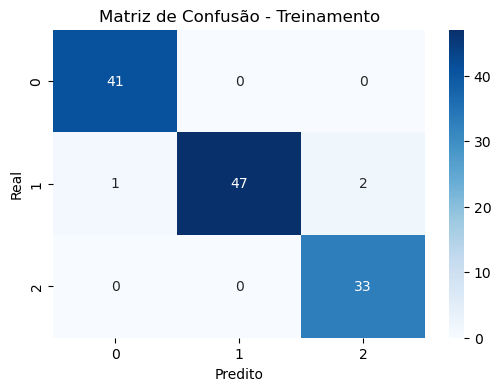

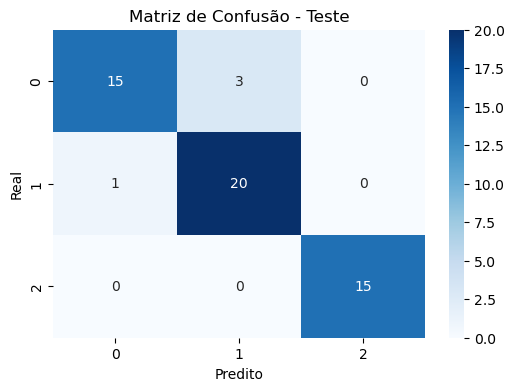

In [171]:
plot_graficos(modelo_pca, X_train_pca, y_train, X_test_pca, y_test, 4)

Modelo: LogisticRegression(C=100, solver='liblinear')


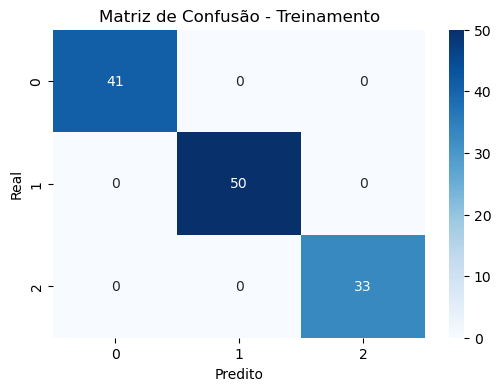

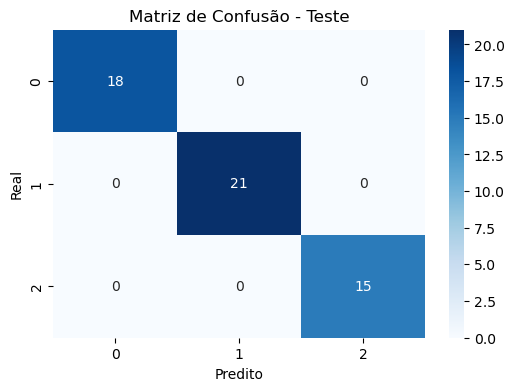

In [172]:
plot_graficos(modelo_all, X_train_std, y_train, X_test_std, y_test, 4)